In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# upload the file
df=pd.read_csv("DATA_Customer-Churn.csv")

### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
# check for null values and exchanging it with the mean
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
def fill_null (df):
    mean_TotalCharges = round(df["TotalCharges"].mean())
    df["TotalCharges"] =  df["TotalCharges"].fillna(value=mean_TotalCharges)
    return df

In [9]:
df = fill_null(df)

In [10]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
churnData = df

In [12]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [13]:
# change categorical values in churn to numerical ones: No = 0 and Yes = 1
churnData.Churn = [i.replace("No", "0") for i in churnData.Churn]
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [14]:
churnData.Churn = [i.replace("Yes", "1") for i in churnData.Churn]
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


### Preparing and Running Logistic Regression

In [15]:
# deterining X and y values as well as spit into train and test data set
X=churnData.drop(['gender', "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "Churn"], axis=1)
y=churnData.Churn

In [16]:
# turning target value in actual numbers
y= y.apply(lambda x: 1 if x=="1" else 0)

In [17]:
# scaling the data and splitting it into train and test

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [18]:
y_train.head()

1695    0
1095    0
3889    0
3667    0
2902    0
Name: Churn, dtype: int64

In [19]:
# Fit a logistic regression model on the training data.
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.600927
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.044   
Dependent Variable: Churn            AIC:              5933.1427
Date:               2021-09-21 19:31 BIC:              5959.1550
No. Observations:   4930             Log-Likelihood:   -2962.6  
Df Model:           3                LL-Null:          -2838.9  
Df Residuals:       4926             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.1926     0.0330    5.8404   0.0000    0.1280    0.2572
x2       -0.3221     0.0775   -4.1553   0.0000   -0.4741   -0.1702
x3 

,Error_metric,Train,Test
0,Accuracy,0.791075,0.796025
1,Precision,0.652474,0.698061
2,Recall,0.437838,0.439024


Confusion matrix for the train set
[[3333  302]
 [ 728  567]]


NameError: name 'plt' is not defined

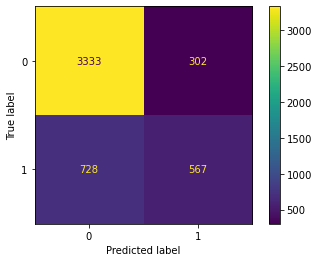

In [23]:
# Check the accuracy on the test data.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### Taking care of imbalanced Data

In [22]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Churn No = 0 and Yes = 1 
churnData['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [35]:
churnData['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

### Standard Downsampling

In [37]:
# Downsampling on O starting with creating two categories
category_0 = churnData[churnData['Churn'] == "0"]
category_1 = churnData[churnData['Churn'] == "1"]


In [41]:
category_0.shape

(5174, 16)

In [42]:
# Downsampling on 0
category_0_down = category_0.sample(len(category_1,))

In [43]:
category_0_down.shape

(1869, 16)

In [44]:
category_1.shape

(1869, 16)

In [46]:
data = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
data_down_sampled  = data.sample(frac=1)
data_down_sampled['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

### Standard Upsampling

In [47]:
# Upsampling on 1 starting with creating two categories
category_0 = churnData[churnData['Churn'] == "0"]
category_1 = churnData[churnData['Churn'] == "1"]

In [48]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 16)


In [50]:
data = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
data_up_sampled = data.sample(frac=1)
data_up_sampled['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

### Upsamplig via SMOTE

In [51]:
#The SMOTE algorithm can be broken down into following steps:

#Randomly pick a point from the minority class.
#Compute the k-nearest neighbors (for some pre-specified k) for this point.
#Add k new points somewhere between the chosen point and each of its neighbors.

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [53]:
y = churnData['Churn']
X = churnData.drop(['gender', "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "Churn"], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [71]:
X_sm

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.850000,29.850000
1,0,34,56.950000,1889.500000
2,0,2,53.850000,108.150000
3,0,45,42.300000,1840.750000
4,0,2,70.700000,151.650000
...,...,...,...,...
10343,0,13,51.331747,687.790295
10344,0,9,86.928226,856.297249
10345,0,14,19.879536,297.409247
10346,0,5,23.885178,115.063279


### Running Logistic Regression model with different down- and upsamplings methods

In [ ]:
# 1) data_down_sampled
# 2) data_up_sampled
# 3) y_sm

### (1) Testing model data_down_sampling

In [58]:
# deterining X and y values as well as spit into train and test data set
X=data_down_sampled.drop(['gender', "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "Churn"], axis=1)
y=data_down_sampled.Churn

In [59]:
# turning target value in actual numbers
y= y.apply(lambda x: 1 if x=="1" else 0)

In [60]:
# scaling the data and splitting it into train and test

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [61]:
# Fit a logistic regression model on the training data.
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.529919
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.235      
Dependent Variable: Churn            AIC:              2780.5365  
Date:               2021-09-21 18:15 BIC:              2804.0141  
No. Observations:   2616             Log-Likelihood:   -1386.3    
Df Model:           3                LL-Null:          -1813.2    
Df Residuals:       2612             LLR p-value:      8.7818e-185
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
x1      0.3036      0.0491     6.1852    0.0000     0.2074     0.3999
x2     -1.3323      0.1496    -8.9085    

,Error_metric,Train,Test
0,Accuracy,0.740061,0.723708
1,Precision,0.727941,0.726003
2,Recall,0.761538,0.731107


Confusion matrix for the train set
[[946 370]
 [310 990]]


NameError: name 'plt' is not defined

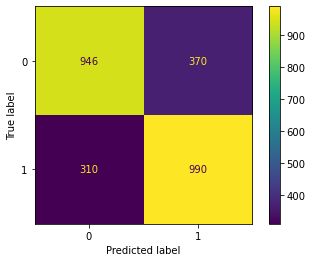

In [62]:
# Check the accuracy on the test data.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### (2) Testing model data_up_sampled

In [63]:
# deterining X and y values as well as spit into train and test data set
X=data_up_sampled.drop(['gender', "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "Churn"], axis=1)
y=data_up_sampled.Churn

In [64]:
# turning target value in actual numbers
y= y.apply(lambda x: 1 if x=="1" else 0)

In [65]:
# scaling the data and splitting it into train and test

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [66]:
# Fit a logistic regression model on the training data.
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.525863
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.241    
Dependent Variable: Churn            AIC:              7625.6477
Date:               2021-09-21 18:18 BIC:              7653.1988
No. Observations:   7243             Log-Likelihood:   -3808.8  
Df Model:           3                LL-Null:          -5020.3  
Df Residuals:       7239             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1       0.2672     0.0293     9.1238   0.0000    0.2098    0.3245
x2      -1.3899     0.0913   -15.2289   0.0000   -1.5688   -1.2111
x3 

,Error_metric,Train,Test
0,Accuracy,0.738506,0.728824
1,Precision,0.728987,0.731784
2,Recall,0.752922,0.737342


Confusion matrix for the train set
[[2643 1006]
 [ 888 2706]]


NameError: name 'plt' is not defined

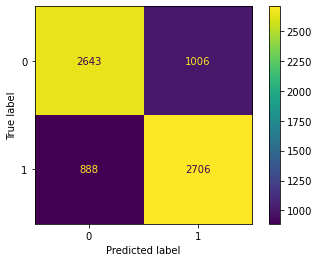

In [67]:
# Check the accuracy on the test data.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### (3) Testing model SMOTE y_sm 

In [72]:
# deterining X and y values as well as spit into train and test data set
X= X_sm
y= y_sm

In [73]:
# turning target value in actual numbers
y= y.apply(lambda x: 1 if x=="1" else 0)

In [74]:
# scaling the data and splitting it into train and test

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [75]:
# Fit a logistic regression model on the training data.
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.521574
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.248    
Dependent Variable: Churn            AIC:              7563.5239
Date:               2021-09-21 18:24 BIC:              7591.0750
No. Observations:   7243             Log-Likelihood:   -3777.8  
Df Model:           3                LL-Null:          -5020.3  
Df Residuals:       7239             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1      -0.0632     0.0282    -2.2427   0.0249   -0.1185   -0.0080
x2      -1.7195     0.0966   -17.8071   0.0000   -1.9087   -1.5302
x3 

,Error_metric,Train,Test
0,Accuracy,0.737678,0.741707
1,Precision,0.724787,0.723483
2,Recall,0.771342,0.770738


Confusion matrix for the train set
[[2533 1067]
 [ 833 2810]]


NameError: name 'plt' is not defined

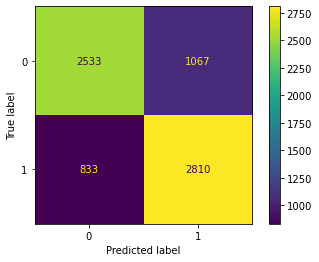

In [76]:
# Check the accuracy on the test data.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

log = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

### Results

With any type of down/up sampling, the recall score increased significantly vs. the first Logistic Regression conducted, to the expense of accuracy on a smaller scale. Concerning Precision, there was a visible upswing for the down/upscaled data-sets identifiable but not as significant as on the aforementioned recall dimension. Within the 3 different down/upscaling methods, the results were very similar on all the 3 dimensions measured. 